<a href="https://colab.research.google.com/github/Rasika-priyaa/Sentiment_Analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

product_reviews.csv not found — creating sample dataset...

Loaded Dataset:
                             text  sentiment
0     Amazing product, I love it!          1
1  Worst item I have ever bought.          0
2   Very useful and good quality.          1
3      Terrible, broke in 2 days.          0
4        Best purchase this year!          1

Training Simple RNN...

Epoch 1/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 0.7154 - val_accuracy: 1.0000 - val_loss: 0.6846
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6667 - loss: 0.6666 - val_accuracy: 0.0000e+00 - val_loss: 0.7611
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 1.0000 - loss: 0.6228 - val_accuracy: 0.0000e+00 - val_loss: 0.8562

RNN Evaluation on Test Set:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - loss: 0.7334
[0.7334216237068176, 0.5]

Training LSTM...

Epoch 1/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 0.6942 - val_accuracy: 0.0000e

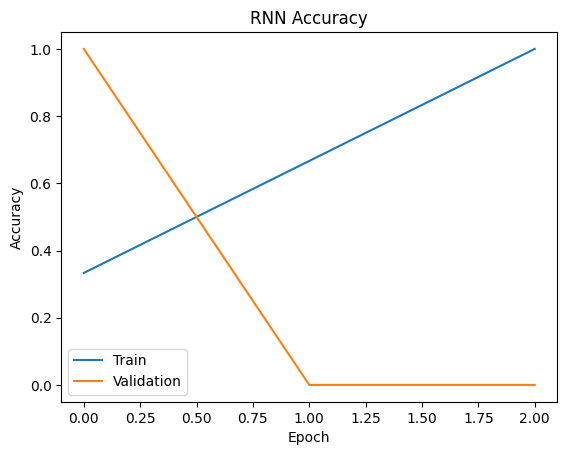

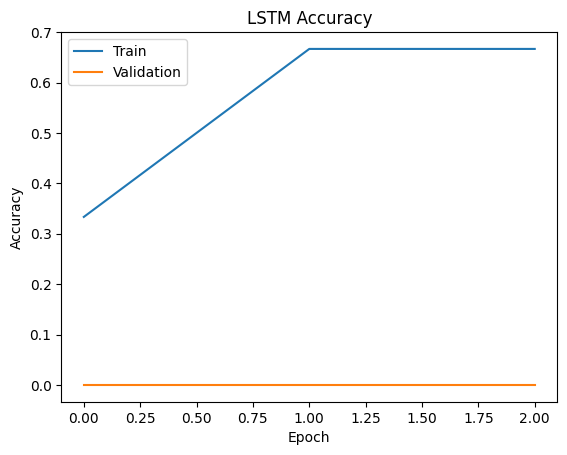

In [1]:
# ============================================================
# PRODUCT SENTIMENT ANALYSIS USING RNN AND LSTM (SINGLE CODE)
# ============================================================

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# ------------------------------------------------------------
# 1. LOAD DATASET (AUTOMATICALLY CREATE IF NOT FOUND)
# ------------------------------------------------------------
if not os.path.exists("product_reviews.csv"):
    print("product_reviews.csv not found — creating sample dataset...")
    sample = {
        "text": [
            "Amazing product, I love it!",
            "Worst item I have ever bought.",
            "Very useful and good quality.",
            "Terrible, broke in 2 days.",
            "Best purchase this year!",
            "Not worth the price at all."
        ],
        "sentiment": [1, 0, 1, 0, 1, 0]
    }
    df = pd.DataFrame(sample)
    df.to_csv("product_reviews.csv", index=False)
else:
    df = pd.read_csv("product_reviews.csv")

print("\nLoaded Dataset:")
print(df.head())

texts = df["text"].astype(str).tolist()
labels = df["sentiment"].astype(int).tolist()

# ------------------------------------------------------------
# 2. TOKENIZE AND PAD TEXT
# ------------------------------------------------------------
tokenizer = Tokenizer(num_words=5000, oov_token="<UNK>")
tokenizer.fit_on_texts(texts)

seqs = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(seqs, maxlen=100)

labels = np.array(labels)

# ------------------------------------------------------------
# 3. TRAIN-TEST SPLIT
# ------------------------------------------------------------
x_train, x_test, y_train, y_test = train_test_split(
    padded, labels, test_size=0.2, random_state=42
)

# ------------------------------------------------------------
# 4. SIMPLE RNN MODEL
# ------------------------------------------------------------
model_rnn = Sequential([
    Embedding(5000, 32),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("\nTraining Simple RNN...\n")
history_rnn = model_rnn.fit(
    x_train, y_train,
    epochs=3, batch_size=4,
    validation_split=0.1,
    verbose=1
)

print("\nRNN Evaluation on Test Set:")
print(model_rnn.evaluate(x_test, y_test))

# ------------------------------------------------------------
# 5. LSTM MODEL
# ------------------------------------------------------------
model_lstm = Sequential([
    Embedding(5000, 32),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("\nTraining LSTM...\n")
history_lstm = model_lstm.fit(
    x_train, y_train,
    epochs=3, batch_size=4,
    validation_split=0.1,
    verbose=1
)

print("\nLSTM Evaluation on Test Set:")
print(model_lstm.evaluate(x_test, y_test))

# ------------------------------------------------------------
# 6. PLOT ACCURACY GRAPHS
# ------------------------------------------------------------
plt.figure()
plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title("RNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

plt.figure()
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title("LSTM Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()
